In [1]:
## importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## User Info Dataframe

In [2]:
user_df = pd.read_csv('/Users/christopher/Desktop/relax_challenge/takehome_users.csv', engine='python', parse_dates=True)
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
## converted columns with time to datetime object

user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])
user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'], unit='s')
user_df.rename(columns={'object_id':'user_id'})

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN


In [5]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [6]:
user_df['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

### Exploratory Data Analysis

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

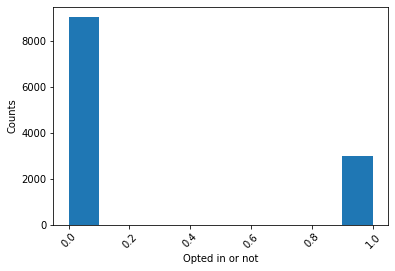

In [7]:
plt.hist(user_df['opted_in_to_mailing_list'].values, range=(0,1))
plt.xlabel('Opted in or not')
plt.ylabel('Counts')
plt.xticks(rotation=45)

In the chart above we can see that most users declined to opt in to mailing list.

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

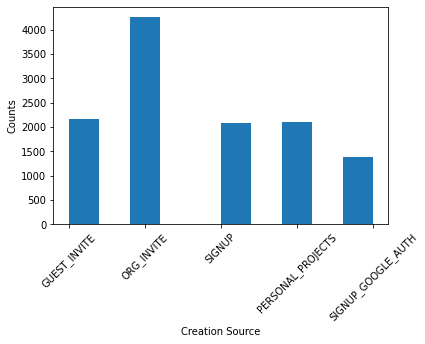

In [8]:
user_df['creation_source'].hist(grid=False)
plt.xlabel('Creation Source')
plt.ylabel('Counts')
plt.xticks(rotation=45)

In the chart above we can see that most users joined the service through a organizational invite. On the other hand not that many users signed up through Google authentication.

## User Engagement Dataframe

In [9]:
engage_df = pd.read_csv('/Users/christopher/Desktop/relax_challenge/takehome_user_engagement.csv', parse_dates=True)

In [10]:
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
## converted columns with time to datetime object and set index 
engage_df['time_stamp'] = pd.to_datetime(engage_df['time_stamp'])
engage_df.set_index(['time_stamp'], inplace=True)
engage_df['user_id'] = engage_df['user_id'].astype('object')


In [12]:
engage_df.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [13]:
## create adopted users

adoption_df = engage_df.groupby(['user_id', pd.Grouper(freq='7D')]).filter(lambda x: len(x)>1).groupby('user_id').sum()
adoption_df.reset_index(inplace=True)

In [14]:
## merge dataframes
final_df = user_df.merge(adoption_df, how='outer', left_on='object_id', right_on='user_id')

## split time/date columns for machine learning
final_df['ct_day'] = final_df['creation_time'].dt.day
final_df['ct_month'] = final_df['creation_time'].dt.month

final_df['lsct_day'] = final_df['last_session_creation_time'].dt.day
final_df['lsct_month'] = final_df['last_session_creation_time'].dt.month

## create target variable 
final_df['adopted_user'] = np.where(final_df['visited'] >= 3, 'adopted', 'not_adopted')
final_df.drop(columns=['user_id', 'visited','email','name', 'object_id', 'creation_time', 
                       'last_session_creation_time'], axis=1, inplace=True)


final_df

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_day,ct_month,lsct_day,lsct_month,adopted_user
0,GUEST_INVITE,1,0,11,10803.0,22,4,22.0,4.0,not_adopted
1,ORG_INVITE,0,0,1,316.0,15,11,31.0,3.0,adopted
2,ORG_INVITE,0,0,94,1525.0,19,3,19.0,3.0,not_adopted
3,GUEST_INVITE,0,0,1,5151.0,21,5,22.0,5.0,not_adopted
4,GUEST_INVITE,0,0,193,5240.0,17,1,22.0,1.0,not_adopted
...,...,...,...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,6,9,6.0,9.0,not_adopted
11996,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,10,1,15.0,1.0,not_adopted
11997,GUEST_INVITE,1,1,83,8074.0,27,4,27.0,4.0,not_adopted
11998,PERSONAL_PROJECTS,0,0,6,NaN,31,5,2.0,6.0,not_adopted


## Machine Learning Model
### Preprocessing

In [15]:
##filling in missing values

print(final_df.isnull().sum())

final_df['invited_by_user_id'] = final_df['invited_by_user_id'].fillna(0)
final_df = final_df.dropna()

creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
ct_day                           0
ct_month                         0
lsct_day                      3177
lsct_month                    3177
adopted_user                     0
dtype: int64


In [16]:
## create X and y variables, encode 'creation_source' column

X = final_df.drop(columns=['adopted_user'])
X = pd.get_dummies(X, drop_first=True)

y = final_df['adopted_user']

In [17]:
## split dataset and scale features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.3, random_state=42)

std = StandardScaler()

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

### Modeling

In [18]:
## baseline model 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

dclf = DummyClassifier(strategy='most_frequent')
dclf.fit(X_train_scaled,y_train)
y_pred = dclf.predict(X_test_scaled)
print('Training Score:',dclf.score(X_train_scaled,y_train))
print('Testing Score',dclf.score(X_test_scaled, y_test))

Training Score: 0.8160621761658031
Testing Score 0.8099735549678881


In [19]:
print(f1_score(y_test,y_pred, average='weighted'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.7249356300777091
              precision    recall  f1-score   support

     adopted       0.00      0.00      0.00       503
 not_adopted       0.81      1.00      0.90      2144

    accuracy                           0.81      2647
   macro avg       0.40      0.50      0.45      2647
weighted avg       0.66      0.81      0.72      2647

[[   0  503]
 [   0 2144]]


/Users/christopher/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
## RandomForestClassifier with grid search hyperparameter tuning


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {'max_depth': [10,20,30],
             'max_features': ['sqrt', 'log2'],
             'n_estimators': [150, 200, 300],
             'criterion' : ['gini', 'entropy']
             }

gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring = 'accuracy')
gs.fit(X_train_scaled, y_train)
y_pred = gs.predict(X_test_scaled)
print("Training Accuracy: {:.2f}".format(gs.score(X_train_scaled, y_train)))
print("Test Accuracy: {:.2f}".format(gs.score(X_test_scaled, y_test)))
gs.best_params_

Training Accuracy: 1.00
Test Accuracy: 0.95


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 150}

In [21]:
print(f1_score(y_test,y_pred, average='weighted'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.9435364700300403
              precision    recall  f1-score   support

     adopted       0.92      0.78      0.84       503
 not_adopted       0.95      0.98      0.97      2144

    accuracy                           0.95      2647
   macro avg       0.93      0.88      0.91      2647
weighted avg       0.94      0.95      0.94      2647

[[ 394  109]
 [  36 2108]]


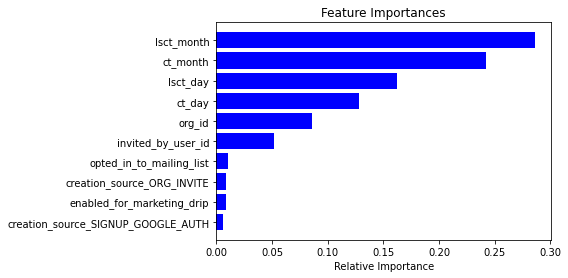

In [22]:
# check Random forest(gridsearchcv) top 10 features

features = X.columns
importances = gs.best_estimator_.feature_importances_
indices = np.argsort(importances)[-10:]  
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to our predictive model the features that help most with predicting whether a user is a adopted user or not are...

1) 'lsct_month'

2) 'ct_month'

3) 'lsct_day'

4) 'ct_day'

5) 'org_id'

6) 'invited_by_user_id'

The top three are in relation to when the user signed up for the service as well as their last interaction with the platform. Another interesting feature that was deemed important was 'org_id', which means the users organization has a effect on use of service. This makes sense if a company is heavily invested within a service it will most likely make their employees use it. It is also interesting to know that prior to running the earlier i assumed 'creation_source' would have a great effect on our model. That was not the case, this column was ranked in the lowest of 'relative importance'.